### Imports

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import time

%matplotlib inline

# seed = int(time.time())
# np.random.seed(seed)

### Read and Preprocess Data

In [11]:
raw_dataframe = pd.read_excel("energy+efficiency/ENB2012_data.xlsx")

print(raw_dataframe.head())
print('Mean of the raw_dataframe:')
print(raw_dataframe.mean())
print('Standard deviation of the raw_dataframe:')
print(raw_dataframe.std())

# Normalizing the data

# dataframe = raw_dataframe.copy()
dataframe = (raw_dataframe - raw_dataframe.mean()) / raw_dataframe.std()

print(dataframe.head())

X = dataframe.iloc[:, :-2]
Y = dataframe.iloc[:, -2:]

print(X.head())
print(Y.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
Mean of the raw_dataframe:
X1      0.764167
X2    671.708333
X3    318.500000
X4    176.604167
X5      5.250000
X6      3.500000
X7      0.234375
X8      2.812500
Y1     22.307195
Y2     24.587760
dtype: float64
Standard deviation of the raw_dataframe:
X1     0.105777
X2    88.086116
X3    43.626481
X4    45.165950
X5     1.751140
X6     1.118763
X7     0.133221
X8     1.550960
Y1    10.090204
Y2     9.513306
dtype: float64
         X1        X2        X3        X4        X5        X6      X7  \
0  2.040447 -1.784712 -0.561586 -1.469119  0.999349 -1.340767 -1.7593   
1  2.040447 -1.784712 -0.561586 -1.469119  0.999349 -0

### Data Visualization

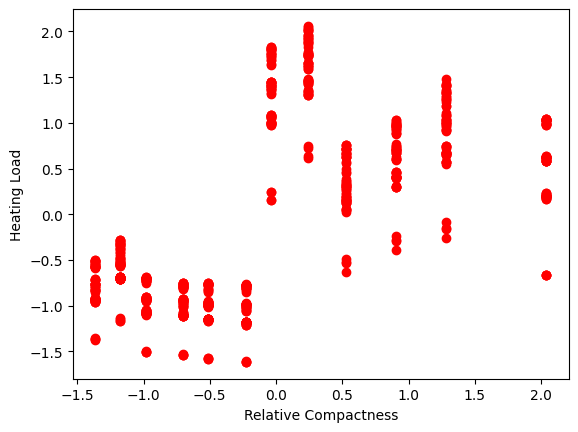

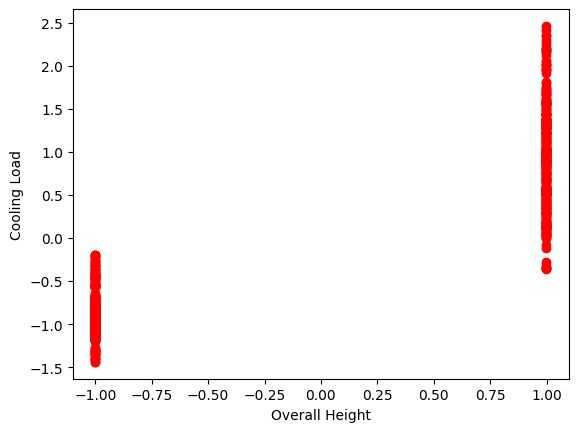

In [12]:
plt.plot(dataframe['X1'], dataframe['Y1'], 'ro')
plt.xlabel('Relative Compactness')
plt.ylabel('Heating Load')
plt.show()

plt.plot(dataframe['X5'], dataframe['Y2'], 'ro')
plt.xlabel('Overall Height')
plt.ylabel('Cooling Load')
plt.show()

### Kernels

In [13]:
def kernel(
    sigma: float,
    bandwidth: float,
    x: np.ndarray,
    y: np.ndarray,
) -> float:
    """ Here we define the kernel function. We use the squared exponential kernel. The kernel function is used to calculate the covariance matrix.

    Args:
        sigma (float)
        bandwidth (float)
        x (np.ndarray)
        y (np.ndarray)

    Returns:
        float: The value of the kernel function at points x and y.
    """
    return np.exp(-1 * np.sum(np.square(x - y)) / (2 * bandwidth ** 2)) * sigma ** 2

# END def kernel

In [14]:

def kernel_matrix(
    sigma: float,
        bandwidth: float,
        X: np.ndarray,
) -> np.ndarray:
    """ Here we define the kernel matrix. The kernel matrix is used to calculate the covariance matrix.

    Args:
            sigma (float)
            bandwidth (float)
            X (np.ndarray)

    Returns:
            np.ndarray: The kernel matrix.
    """
    n = X.shape[0]
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(sigma, bandwidth, X[i], X[j])
        # END for
    # END for
    return K
# END def kernel_matrix

### Train Test Split (30-70)

In [17]:
N = len(X)
f = 0.3
n_train, n_test = N - int(f * N), int(f * N)
print(n_train, n_test)

X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

538 230
(538, 8) (230, 8)
(538, 2) (230, 2)
